In [183]:
## Importing the libraries
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [184]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [185]:
df_train = pd.read_csv('Train_dataset.csv')
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [186]:
df_train['Endorsed By'].isna().sum()

0

In [187]:
df_test = pd.read_csv('Test_dataset.csv')
df_test.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,20001,0,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,1,1,0,2,Bar,Greek,3,0,10,5,3,5,8,6.0,NaN,2.0,NaN,NaN,5,2,2,6,0
1,20002,0,"tibetan,italian",Hyderabad,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,1,1,1,2,Bar,Nature,4,0,10,4,5,6,8,9.0,3.0,NaN,NaN,6.0,7,8,5,1,8
2,20003,0,"algerian,belgian",Hyderabad,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,1,0,1,2,Bar,Greek,2,0,6,5,5,6,9,6.0,3.0,NaN,NaN,NaN,9,7,5,1,5
3,20004,0,"tibetan,greek",-1,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,1,1,1,2,Gastro Bar,90's,3,0,10,5,5,5,9,9.0,6.0,NaN,NaN,NaN,6,7,6,4,7
4,20005,0,"cuban,british",Pune,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,1,0,0,1,Bar,Mise En,4,1,7,5,5,7,8,NaN,NaN,NaN,NaN,NaN,4,4,7,7,3


In [188]:
df_train.shape

(3493, 34)

In [189]:
df_test.shape

(500, 34)

In [190]:
df=pd.concat([df_train,df_test])
df.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [191]:
df.tail()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
495,20496,0,"indian,irish",Noida,Near Party Hub,08-09-2009,72.00,Not Specific,72.00,1,1,1,1,1,2.0,Bar,90's,3,0,4,4,5,5,9,9.0,5.0,NaN,NaN,NaN,7.0,8,5,2,7
496,20497,0,"tibetan,greek",Bangalore,Near Party Hub,20-06-2007,78.28,Not Specific,53.55,1,1,1,1,0,2.0,Bar,90's,1,0,7,5,4,4,9,8.0,3.0,NaN,NaN,NaN,9.0,8,8,4,8
497,20498,0,"indian,irish",Bangalore,Near Party Hub,19-06-2010,72.60,Tier A Celebrity,71.40,0,1,0,0,1,2.0,Bar,90's,2,1,3,6,5,6,8,9.0,5.0,NaN,4.0,NaN,1.0,6,5,7,2
498,20499,0,"tibetan,greek",Chennai,Near Party Hub,23-08-2012,93.40,Not Specific,95.90,1,1,0,1,0,2.0,Bar,Greek,3,0,7,6,6,6,6,9.0,6.0,6.0,NaN,NaN,7.0,7,2,3,5
499,20500,0,"tibetan,greek",Bhopal,Near Party Hub,10-03-2010,65.50,Not Specific,68.20,1,1,0,1,1,2.0,Caffee,Arabian,4,0,5,4,5,6,7,9.0,5.0,NaN,NaN,NaN,7.0,6,6,7,7


In [192]:
df.iloc[3490:3494,:]

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
3490,63491,42500000,"indian,irish",Chennai,Near Party Hub,21-05-2009,80.83,Not Specific,86.8,1,1,1,1,0,2.0,Bar,Nature,3,1,8,5,4,6,6,8.0,NaN,NaN,NaN,3.0,6.0,8,3,3,7
3491,63492,53000000,"japanese,thai",Bangalore,Near Party Hub,22-06-2008,79.40,Not Specific,86.0,1,1,1,1,1,2.0,Bar,Greek,3,1,5,5,3,5,10,7.0,3.0,2.0,NaN,NaN,7.0,6,3,3,6
3492,63493,12000000,"indian,irish",Ghaziabad,Near Party Hub,23-04-2009,72.00,Not Specific,67.0,1,1,1,1,1,2.0,Bar,Greek,2,0,2,4,4,4,5,NaN,1.0,NaN,NaN,NaN,6.0,9,6,3,8
0,20001,0,"tibetan,italian",Bangalore,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.0,1,1,1,1,0,2.0,Bar,Greek,3,0,10,5,3,5,8,6.0,NaN,2.0,NaN,NaN,5.0,2,2,6,0


In [193]:
null=df.isna().sum()/len(df)*100
null[null>0]

Facebook Popularity Quotient      2.479339
Instagram Popularity Quotient     1.402454
Resturant Tier                    1.227148
Overall Restaurant Rating         6.160781
Live Music Rating                21.712998
Comedy Gigs Rating               71.450038
Value Deals Rating               77.435512
Live Sports Rating               94.139745
Ambience                          0.626096
dtype: float64

In [194]:
#Drop variables Comedy Gigs Rating, Value Deals Rating, Live Sports Rating

In [195]:
df=df.drop(['Comedy Gigs Rating','Value Deals Rating','Live Sports Rating'], axis=1)

In [196]:
null=df.isna().sum()/len(df)*100
null[null>0]

Facebook Popularity Quotient      2.479339
Instagram Popularity Quotient     1.402454
Resturant Tier                    1.227148
Overall Restaurant Rating         6.160781
Live Music Rating                21.712998
Ambience                          0.626096
dtype: float64

### Facebook Popularity Quotient

In [197]:
df['Facebook Popularity Quotient'].describe()

count    3894.000000
mean       77.887678
std         9.861789
min        43.000000
25%        71.660000
50%        79.000000
75%        85.667500
max        97.760000
Name: Facebook Popularity Quotient, dtype: float64

<AxesSubplot:xlabel='Facebook Popularity Quotient', ylabel='Density'>

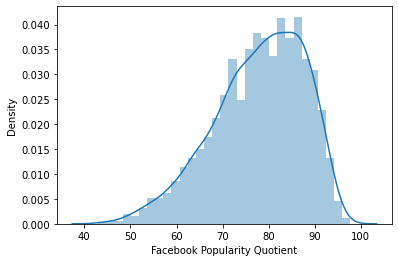

In [198]:
sns.distplot(df['Facebook Popularity Quotient'])

In [199]:
df['Facebook Popularity Quotient']=df['Facebook Popularity Quotient'].fillna(df['Facebook Popularity Quotient'].median())

<AxesSubplot:xlabel='Facebook Popularity Quotient', ylabel='Annual Turnover'>

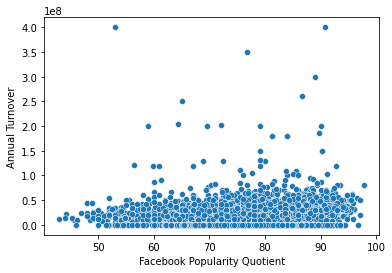

In [200]:
sns.scatterplot(df['Facebook Popularity Quotient'], df['Annual Turnover'])

### Instagram Popularity Quotient

In [201]:
df['Instagram Popularity Quotient'].describe()

count    3937.000000
mean       74.448954
std        10.990665
min        40.000000
25%        66.000000
50%        74.330000
75%        82.600000
max        98.700000
Name: Instagram Popularity Quotient, dtype: float64

<AxesSubplot:xlabel='Instagram Popularity Quotient', ylabel='Density'>

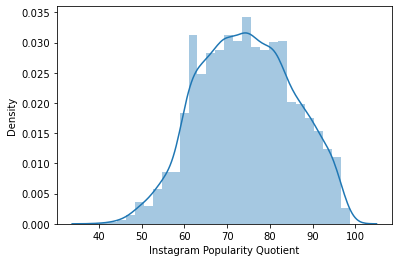

In [202]:
sns.distplot(df['Instagram Popularity Quotient'])

In [203]:
df['Instagram Popularity Quotient']=df['Instagram Popularity Quotient'].fillna(df['Instagram Popularity Quotient'].mean())

<AxesSubplot:xlabel='Facebook Popularity Quotient', ylabel='Annual Turnover'>

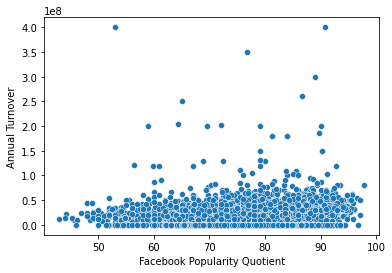

In [204]:
sns.scatterplot(df['Facebook Popularity Quotient'], df['Annual Turnover'])

In [205]:
null=df.isna().sum()/len(df)*100
null[null>0]

Resturant Tier                1.227148
Overall Restaurant Rating     6.160781
Live Music Rating            21.712998
Ambience                      0.626096
dtype: float64

### Resturant Tier

In [206]:
df['Resturant Tier'].value_counts()

2.0    3657
1.0     287
Name: Resturant Tier, dtype: int64

In [207]:
df['Resturant Tier']=df['Resturant Tier'].fillna(df['Resturant Tier'].mode()[0])

<AxesSubplot:xlabel='Resturant Tier', ylabel='Annual Turnover'>

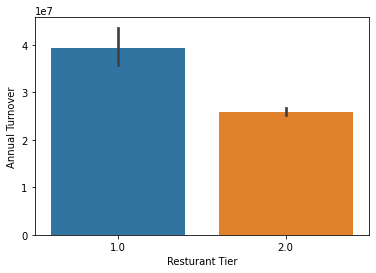

In [208]:
sns.barplot(df['Resturant Tier'], df['Annual Turnover'])

In [209]:
null=df.isna().sum()/len(df)*100
null[null>0]

Overall Restaurant Rating     6.160781
Live Music Rating            21.712998
Ambience                      0.626096
dtype: float64

### Overall Restaurant Rating

In [210]:
df['Overall Restaurant Rating'].value_counts()

9.0     1175
10.0     975
7.0      657
8.0      602
6.0      338
Name: Overall Restaurant Rating, dtype: int64

In [211]:
df['Overall Restaurant Rating']=df['Overall Restaurant Rating'].replace(np.nan,0)

<AxesSubplot:xlabel='Overall Restaurant Rating', ylabel='Annual Turnover'>

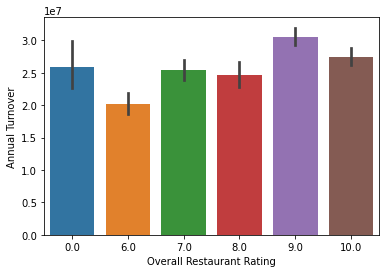

In [212]:
sns.barplot(df['Overall Restaurant Rating'],df['Annual Turnover'])

In [213]:
null=df.isna().sum()/len(df)*100
null[null>0]

Live Music Rating    21.712998
Ambience              0.626096
dtype: float64

### Ambience

In [214]:
df['Ambience'].value_counts()

6.0     783
8.0     752
7.0     685
5.0     428
9.0     403
4.0     401
10.0    184
3.0     167
2.0     103
1.0      34
0.0      28
Name: Ambience, dtype: int64

In [215]:
df['Ambience']=df['Ambience'].replace(np.nan,0)

<AxesSubplot:xlabel='Ambience', ylabel='Annual Turnover'>

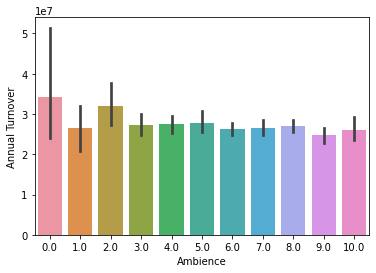

In [216]:
sns.barplot(df['Ambience'], df['Annual Turnover'])

In [217]:
null=df.isna().sum()/len(df)*100
null[null>0]

Live Music Rating    21.712998
dtype: float64

In [218]:
df['Ambience']=df['Ambience'].astype('object')

In [219]:
# df=df.drop('Ambience', axis=1)

### Live Music Rating

In [220]:
df['Live Music Rating'].value_counts()

4.0    1277
3.0     780
5.0     723
6.0     183
2.0     112
1.0      32
7.0      17
8.0       2
Name: Live Music Rating, dtype: int64

In [221]:
import numpy as np
df['Live Music Rating']=df['Live Music Rating'].replace({np.nan:0})

<AxesSubplot:xlabel='Live Music Rating', ylabel='Annual Turnover'>

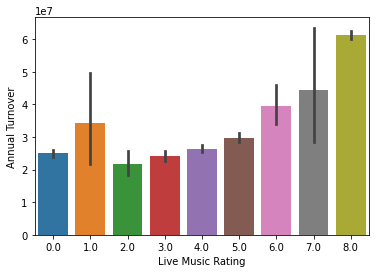

In [222]:
sns.barplot(df['Live Music Rating'], df['Annual Turnover'])

In [223]:
null=df.isna().sum()/len(df)*100
null[null>0]

Series([], dtype: float64)

# Opening Day of Restaurant

In [224]:
df['Opening Day of Restaurant']=df['Opening Day of Restaurant'].str.slice(-4)

In [225]:
df['Opening Day of Restaurant'].unique()

array(['2009', '2008', '2011', '2010', '2012', '2006', '2007', '2005',
       '2013', '1996', '2004', '2014', '2016', '2002', '2003', '2000',
       '2001'], dtype=object)

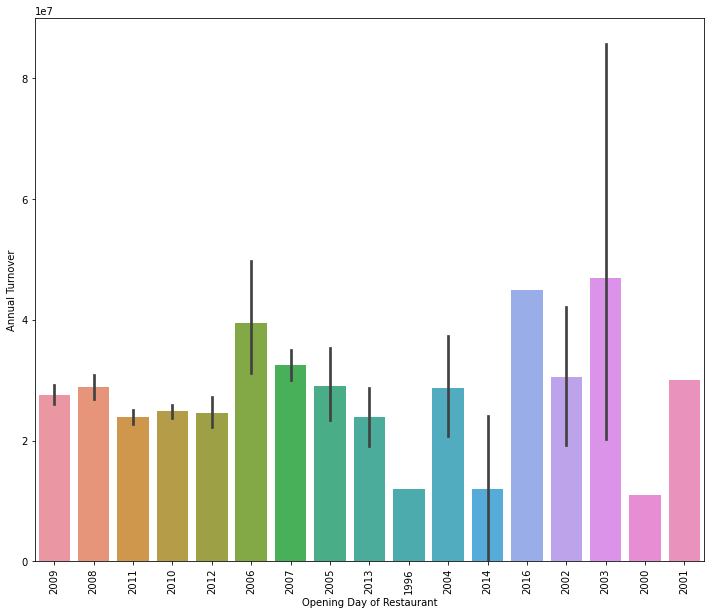

In [226]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.barplot(df['Opening Day of Restaurant'],df['Annual Turnover'])
plt.xticks(rotation=90)
plt.show()

In [227]:
yr=df.groupby(['Opening Day of Restaurant'])[['Annual Turnover']].mean().sort_values('Annual Turnover')
yr

,Annual Turnover
Opening Day of Restaurant,
2000,1.100000e+07
1996,1.200000e+07
2014,1.200000e+07
2011,2.385549e+07
2013,2.394828e+07
2012,2.465034e+07
2010,2.484079e+07
2009,2.757051e+07
2004,2.879310e+07


In [228]:
yr.index

Index(['2000', '1996', '2014', '2011', '2013', '2012', '2010', '2009', '2004',
       '2008', '2005', '2001', '2002', '2007', '2006', '2016', '2003'],
      dtype='object', name='Opening Day of Restaurant')

In [229]:
d={}
c=1
for i in yr.index:
    d[i]=c
    c=c+1
print(d)

{'2000': 1, '1996': 2, '2014': 3, '2011': 4, '2013': 5, '2012': 6, '2010': 7, '2009': 8, '2004': 9, '2008': 10, '2005': 11, '2001': 12, '2002': 13, '2007': 14, '2006': 15, '2016': 16, '2003': 17}


In [230]:
df['Opening Day of Restaurant']=df['Opening Day of Restaurant'].map(d)

In [231]:
df['Opening Day of Restaurant']=df['Opening Day of Restaurant'].astype('object')

In [232]:
#drop city column
df=df.drop('City', axis=1)

In [233]:
df.head()

,Registration Number,Annual Turnover,Cuisine,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Near Business Hub,8,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,8,8,6,6,6
1,60002,50000000,"indian,irish",Near Party Hub,10,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,0.0,5,7,7,3,8
2,60003,32500000,"tibetan,italian",Near Business Hub,4,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,7,10,5,2,8
3,60004,110000000,"turkish,nigerian",Near Party Hub,10,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,7,7,4,3,5
4,60005,20000000,"irish,belgian",Near Party Hub,7,79.0,Tier A Celebrity,76.8,1,1,1,1,1,2.0,Bar,Greek,3,0,10,5,6,4,8,6.0,0.0,0,6,2,4,6


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3993 entries, 0 to 499
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3993 non-null   int64  
 1   Annual Turnover                3993 non-null   int64  
 2   Cuisine                        3993 non-null   object 
 3   Restaurant Location            3993 non-null   object 
 4   Opening Day of Restaurant      3993 non-null   object 
 5   Facebook Popularity Quotient   3993 non-null   float64
 6   Endorsed By                    3993 non-null   object 
 7   Instagram Popularity Quotient  3993 non-null   float64
 8   Fire Audit                     3993 non-null   int64  
 9   Liquor License Obtained        3993 non-null   int64  
 10  Situated in a Multi Complex    3993 non-null   int64  
 11  Dedicated Parking              3993 non-null   int64  
 12  Open Sitting Available         3993 non-null   in

# Restaurant City Tier

In [235]:
df['Restaurant City Tier'].value_counts()

0    2794
1    1199
Name: Restaurant City Tier, dtype: int64

In [236]:
df['Restaurant City Tier']=df['Restaurant City Tier'].astype('object')

In [237]:
df['Restaurant City Tier'].dtype

dtype('O')

<AxesSubplot:xlabel='Restaurant City Tier', ylabel='Annual Turnover'>

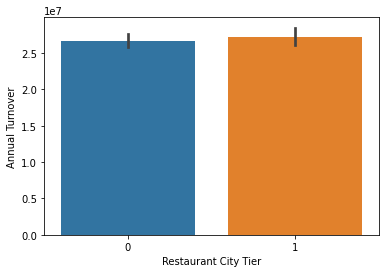

In [238]:
sns.barplot(df['Restaurant City Tier'],df['Annual Turnover'])

In [239]:
# df=df.drop('Restaurant City Tier', axis=1)

# Resturant Tier

In [240]:
df['Resturant Tier'].value_counts()

2.0    3706
1.0     287
Name: Resturant Tier, dtype: int64

In [241]:
df['Resturant Tier']=df['Resturant Tier'].astype('object')

In [242]:
df['Resturant Tier'].dtype

dtype('O')

<AxesSubplot:xlabel='Resturant Tier', ylabel='Annual Turnover'>

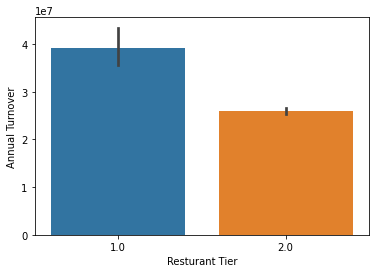

In [243]:
sns.barplot(df['Resturant Tier'],df['Annual Turnover'])

# Open Sitting Available

In [244]:
df['Open Sitting Available'].value_counts()

1    3197
0     796
Name: Open Sitting Available, dtype: int64

In [245]:
df['Open Sitting Available']=df['Open Sitting Available'].astype('object')

In [246]:
df['Open Sitting Available'].dtype

dtype('O')

<AxesSubplot:xlabel='Open Sitting Available', ylabel='Annual Turnover'>

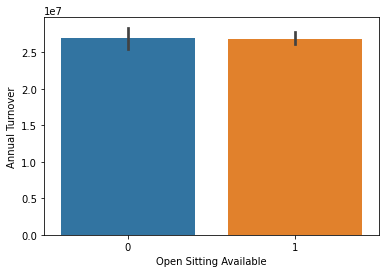

In [247]:
sns.barplot(df['Open Sitting Available'],df['Annual Turnover'])

In [248]:
# df=df.drop('Open Sitting Available', axis=1)

# Dedicated Parking

In [249]:
df['Dedicated Parking'].value_counts()

1    3205
0     788
Name: Dedicated Parking, dtype: int64

In [250]:
df['Dedicated Parking']=df['Dedicated Parking'].astype('object')

In [251]:
df['Dedicated Parking'].dtype

dtype('O')

<AxesSubplot:xlabel='Dedicated Parking', ylabel='Annual Turnover'>

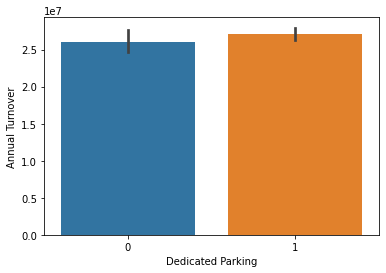

In [252]:
sns.barplot(df['Dedicated Parking'],df['Annual Turnover'])

In [253]:
# df=df.drop('Dedicated Parking', axis=1)

# Situated in a Multi Complex

In [254]:
df['Situated in a Multi Complex'].value_counts()

1    3217
0     776
Name: Situated in a Multi Complex, dtype: int64

In [255]:
df['Situated in a Multi Complex']=df['Situated in a Multi Complex'].astype('object')

In [256]:
df['Situated in a Multi Complex'].dtype

dtype('O')

<AxesSubplot:xlabel='Situated in a Multi Complex', ylabel='Annual Turnover'>

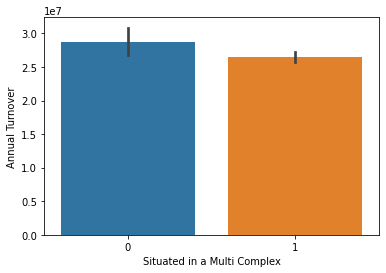

In [257]:
sns.barplot(df['Situated in a Multi Complex'],df['Annual Turnover'])

# Liquor License Obtained

In [258]:
df['Liquor License Obtained'].value_counts()

1    3945
0      48
Name: Liquor License Obtained, dtype: int64

In [259]:
df['Liquor License Obtained']=df['Liquor License Obtained'].astype('object')

In [260]:
df['Liquor License Obtained'].dtype

dtype('O')

<AxesSubplot:xlabel='Liquor License Obtained', ylabel='Annual Turnover'>

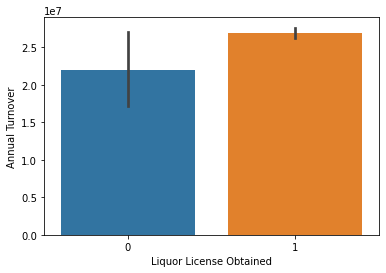

In [261]:
sns.barplot(df['Liquor License Obtained'],df['Annual Turnover'])

# Fire Audit

In [262]:
df['Fire Audit'].value_counts()

1    3162
0     831
Name: Fire Audit, dtype: int64

In [263]:
df['Fire Audit']=df['Fire Audit'].astype('object')

In [264]:
df['Fire Audit'].dtypes

dtype('O')

<AxesSubplot:xlabel='Fire Audit', ylabel='Annual Turnover'>

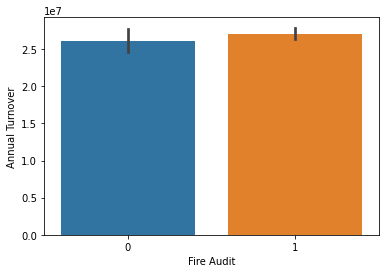

In [265]:
sns.barplot(df['Fire Audit'],df['Annual Turnover'])

In [266]:
df['Privacy']=df['Privacy'].astype('object')
df['Comfortablility']=df['Comfortablility'].astype('object')
df['Service']=df['Service'].astype('object')
df['Lively']=df['Lively'].astype('object')
df['Live Music Rating']=df['Live Music Rating'].astype('object')
df['Overall Restaurant Rating']=df['Overall Restaurant Rating'].astype('object')
df['Food Rating']=df['Food Rating'].astype('object')
df['Hygiene Rating']=df['Hygiene Rating'].astype('object')
df['Value for Money']=df['Value for Money'].astype('object')
df['Staff Responsivness']=df['Staff Responsivness'].astype('object')
df['Order Wait Time']=df['Order Wait Time'].astype('object')
df['Restaurant Zomato Rating']=df['Restaurant Zomato Rating'].astype('object')

<AxesSubplot:xlabel='Privacy', ylabel='Annual Turnover'>

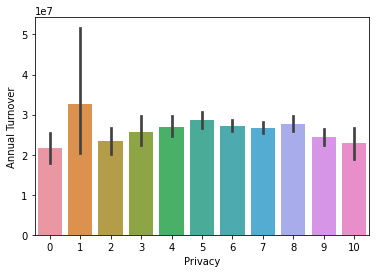

In [267]:
sns.barplot(df['Privacy'],df['Annual Turnover'])

<AxesSubplot:xlabel='Comfortablility', ylabel='Annual Turnover'>

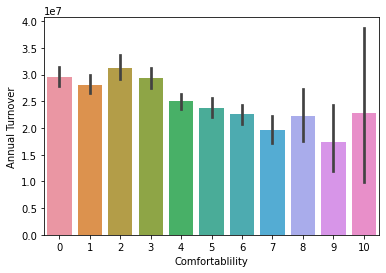

In [268]:
sns.barplot(df['Comfortablility'],df['Annual Turnover'])

<AxesSubplot:xlabel='Service', ylabel='Annual Turnover'>

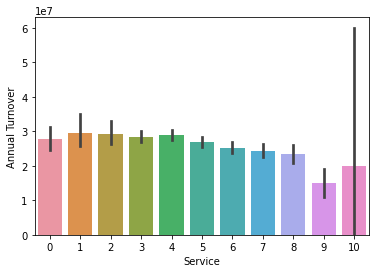

In [269]:
sns.barplot(df['Service'],df['Annual Turnover'])

<AxesSubplot:xlabel='Lively', ylabel='Annual Turnover'>

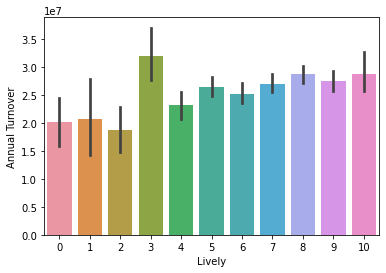

In [270]:
sns.barplot(df['Lively'],df['Annual Turnover'])

<AxesSubplot:xlabel='Food Rating', ylabel='Annual Turnover'>

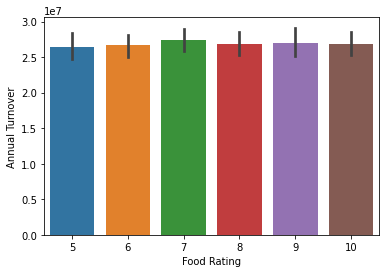

In [271]:
sns.barplot(df['Food Rating'],df['Annual Turnover'])

In [272]:
# df=df.drop('Food Rating', axis=1)

<AxesSubplot:xlabel='Hygiene Rating', ylabel='Annual Turnover'>

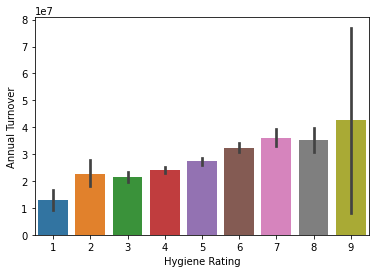

In [273]:
sns.barplot(df['Hygiene Rating'],df['Annual Turnover'])

<AxesSubplot:xlabel='Value for Money', ylabel='Annual Turnover'>

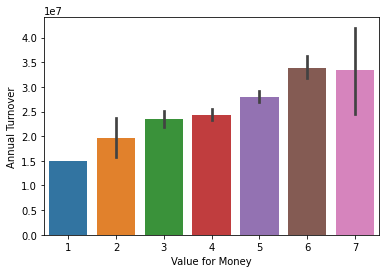

In [274]:
sns.barplot(df['Value for Money'],df['Annual Turnover'])

<AxesSubplot:xlabel='Staff Responsivness', ylabel='Annual Turnover'>

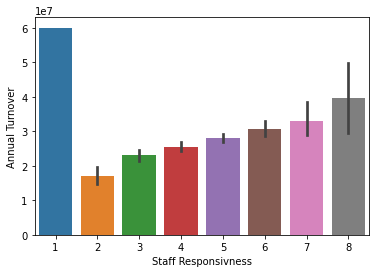

In [275]:
sns.barplot(df['Staff Responsivness'],df['Annual Turnover'])

<AxesSubplot:xlabel='Order Wait Time', ylabel='Annual Turnover'>

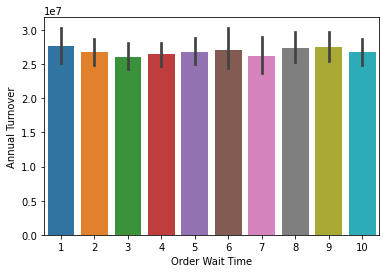

In [276]:
sns.barplot(df['Order Wait Time'],df['Annual Turnover'])

In [277]:
# df=df.drop('Order Wait Time', axis=1)

<AxesSubplot:xlabel='Restaurant Zomato Rating', ylabel='Annual Turnover'>

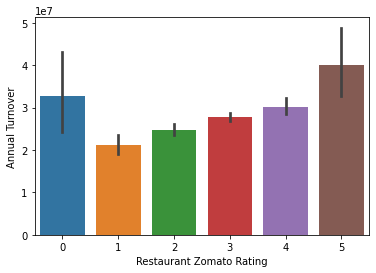

In [278]:
sns.barplot(df['Restaurant Zomato Rating'],df['Annual Turnover'])

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3993 entries, 0 to 499
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3993 non-null   int64  
 1   Annual Turnover                3993 non-null   int64  
 2   Cuisine                        3993 non-null   object 
 3   Restaurant Location            3993 non-null   object 
 4   Opening Day of Restaurant      3993 non-null   object 
 5   Facebook Popularity Quotient   3993 non-null   float64
 6   Endorsed By                    3993 non-null   object 
 7   Instagram Popularity Quotient  3993 non-null   float64
 8   Fire Audit                     3993 non-null   object 
 9   Liquor License Obtained        3993 non-null   object 
 10  Situated in a Multi Complex    3993 non-null   object 
 11  Dedicated Parking              3993 non-null   object 
 12  Open Sitting Available         3993 non-null   ob

# Outliers

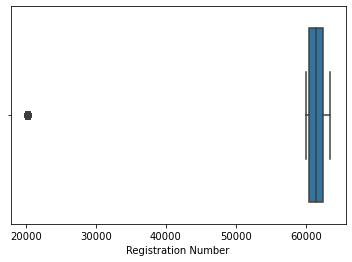

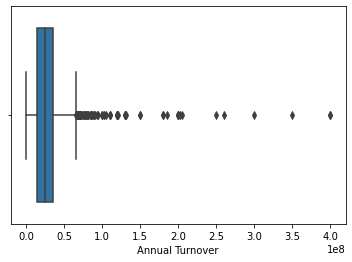

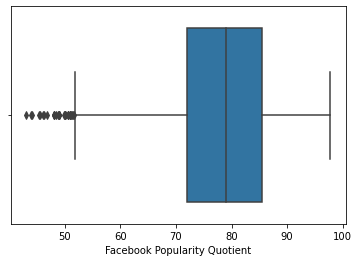

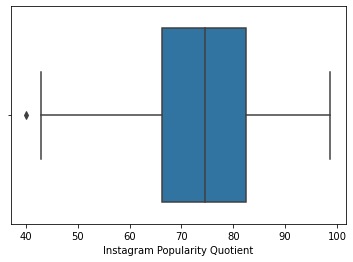

In [280]:
import matplotlib.pyplot as plt
df_num=df.select_dtypes('number')
for i in df_num.columns:
    plt.subplots()
    sns.boxplot(df[i])

# Multicollinearity

<AxesSubplot:>

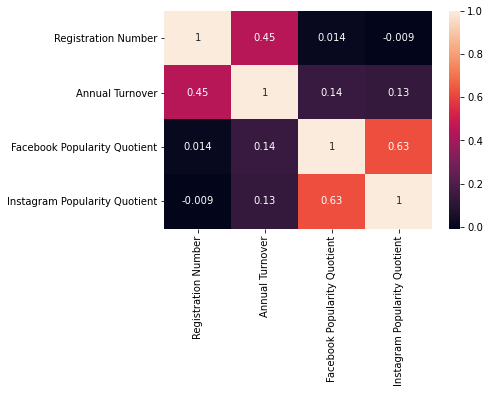

In [281]:
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True)

### Cuisine

In [282]:
df['Cuisine'].value_counts()

tibetan,greek          801
welsh,thai             403
indian,irish           318
british,japanese       315
tibetan,italian        311
turkish,nigerian       246
japanese,thai          223
chinese,salvadorian    186
algerian,belgian       176
turkish,sapnish        160
peruvian,cuban         134
polish,jewish          127
algerian,korean        102
swedish,greek          102
cuban,british           96
irish,belgian           95
algerian,algerian       72
hawaiian,latvian        55
british,belgian         43
nigerian,cajun          28
Name: Cuisine, dtype: int64

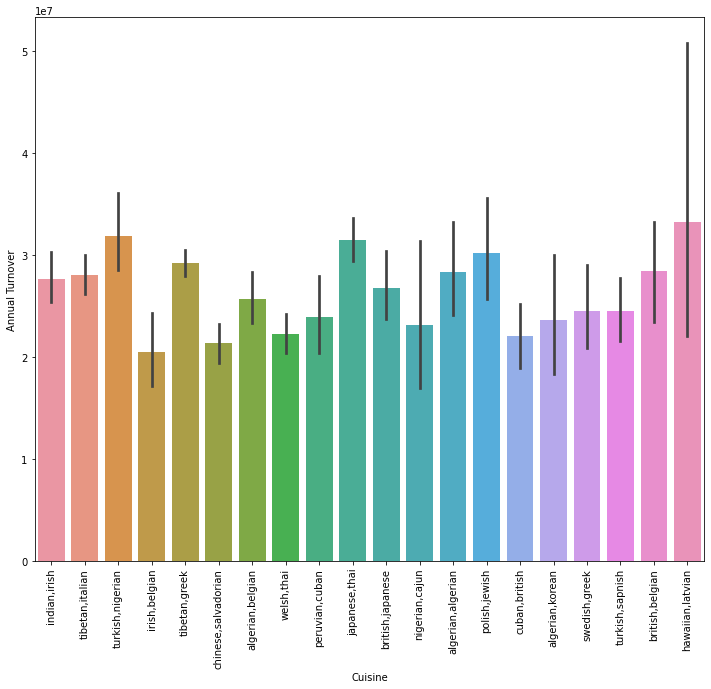

In [283]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.barplot(df['Cuisine'], df['Annual Turnover'])
plt.xticks(rotation=90)
plt.show()

In [284]:
tmp=df.groupby(['Cuisine'])[['Annual Turnover']].mean().sort_values('Annual Turnover')
tmp

,Annual Turnover
Cuisine,
"irish,belgian",2.044211e+07
"chinese,salvadorian",2.137634e+07
"cuban,british",2.203125e+07
"welsh,thai",2.226427e+07
"nigerian,cajun",2.314286e+07
"algerian,korean",2.366176e+07
"peruvian,cuban",2.389925e+07
"swedish,greek",2.448039e+07
"turkish,sapnish",2.448438e+07


In [285]:
tmp.index

Index(['irish,belgian', 'chinese,salvadorian', 'cuban,british', 'welsh,thai',
       'nigerian,cajun', 'algerian,korean', 'peruvian,cuban', 'swedish,greek',
       'turkish,sapnish', 'algerian,belgian', 'british,japanese',
       'indian,irish', 'tibetan,italian', 'algerian,algerian',
       'british,belgian', 'tibetan,greek', 'polish,jewish', 'japanese,thai',
       'turkish,nigerian', 'hawaiian,latvian'],
      dtype='object', name='Cuisine')

In [286]:
d={}
c=1
for i in tmp.index:
    d[i]=c
    c=c+1
print(d)

{'irish,belgian': 1, 'chinese,salvadorian': 2, 'cuban,british': 3, 'welsh,thai': 4, 'nigerian,cajun': 5, 'algerian,korean': 6, 'peruvian,cuban': 7, 'swedish,greek': 8, 'turkish,sapnish': 9, 'algerian,belgian': 10, 'british,japanese': 11, 'indian,irish': 12, 'tibetan,italian': 13, 'algerian,algerian': 14, 'british,belgian': 15, 'tibetan,greek': 16, 'polish,jewish': 17, 'japanese,thai': 18, 'turkish,nigerian': 19, 'hawaiian,latvian': 20}


In [287]:
df['Cuisine']=df['Cuisine'].map(d)

In [288]:
df['Cuisine']=df['Cuisine'].astype('object')

### Restaurant Location

<AxesSubplot:xlabel='Restaurant Location', ylabel='Annual Turnover'>

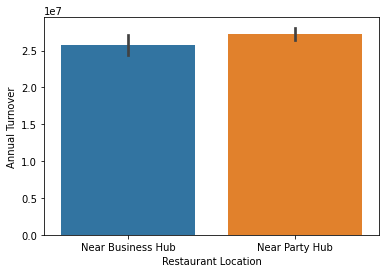

In [289]:
sns.barplot(df['Restaurant Location'],df['Annual Turnover'])

In [290]:
df['Restaurant Location'].value_counts()

Near Party Hub       3036
Near Business Hub     957
Name: Restaurant Location, dtype: int64

### Endorsed By

In [291]:
df['Endorsed By'].value_counts()

Not Specific        2260
Tier A Celebrity    1696
Local Celebrity       37
Name: Endorsed By, dtype: int64

<AxesSubplot:xlabel='Endorsed By', ylabel='Annual Turnover'>

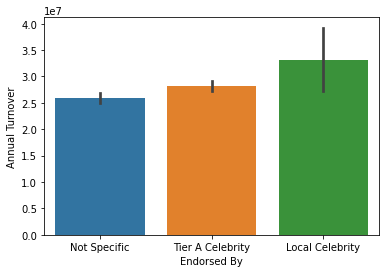

In [292]:
sns.barplot(df['Endorsed By'],df['Annual Turnover'])

## Restaurant Type

<AxesSubplot:xlabel='Restaurant Type', ylabel='Annual Turnover'>

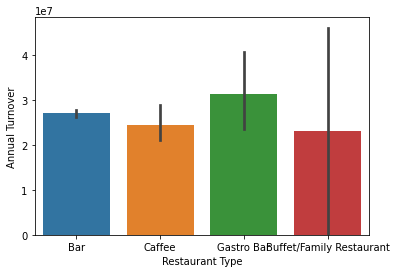

In [293]:
sns.barplot(df['Restaurant Type'], df['Annual Turnover'])

In [294]:
df['Restaurant Type'].value_counts()

Bar                         3695
Caffee                       243
Gastro Bar                    53
Buffet/Family Restaurant       2
Name: Restaurant Type, dtype: int64

# Restaurant Theme

In [295]:
df['Restaurant Theme'].value_counts()

Arabian      1592
Greek        1163
90's          659
Nature        201
Parsi         121
Chinese        82
Molino         29
Delicio        27
English        20
Belise         15
Moonrise       13
Downtown       10
Mise En         9
TheGem          6
Carbone         6
Marco           5
Petit           5
Benedicta       4
Picante         4
Umami           3
Savory          2
Bettaso         2
Cafepro         2
Ambiance        2
Resca           2
Italica         1
Grand           1
Bakery          1
Sage            1
Piquant         1
Flavors         1
Cinnamon        1
Spoon           1
LaCuisine       1
Name: Restaurant Theme, dtype: int64

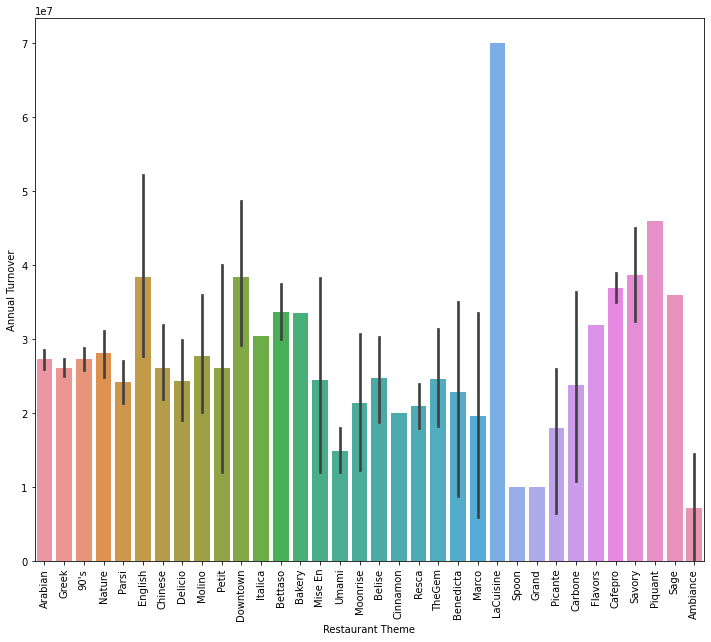

In [296]:
plt.figure(figsize=(12,10))
sns.barplot(df['Restaurant Theme'], df['Annual Turnover'])
plt.xticks(rotation=90)
plt.show()

In [297]:
temp=df.groupby(['Restaurant Theme'])[['Annual Turnover']].mean().sort_values('Annual Turnover')
temp

,Annual Turnover
Restaurant Theme,
Ambiance,7.250000e+06
Spoon,1.000000e+07
Grand,1.000000e+07
Umami,1.483333e+07
Picante,1.800000e+07
Marco,1.960000e+07
Cinnamon,2.000000e+07
Resca,2.100000e+07
Moonrise,2.134615e+07


In [298]:
temp.index

Index(['Ambiance', 'Spoon', 'Grand', 'Umami', 'Picante', 'Marco', 'Cinnamon',
       'Resca', 'Moonrise', 'Benedicta', 'Carbone', 'Parsi', 'Delicio',
       'Mise En', 'TheGem', 'Belise', 'Chinese', 'Petit', 'Greek', 'Arabian',
       '90's', 'Molino', 'Nature', 'Italica', 'Flavors', 'Bakery', 'Bettaso',
       'Sage', 'Cafepro', 'English', 'Downtown', 'Savory', 'Piquant',
       'LaCuisine'],
      dtype='object', name='Restaurant Theme')

In [299]:
d={}
c=1
for i in temp.index:
    d[i]=c
    c=c+1
print(d)

{'Ambiance': 1, 'Spoon': 2, 'Grand': 3, 'Umami': 4, 'Picante': 5, 'Marco': 6, 'Cinnamon': 7, 'Resca': 8, 'Moonrise': 9, 'Benedicta': 10, 'Carbone': 11, 'Parsi': 12, 'Delicio': 13, 'Mise En': 14, 'TheGem': 15, 'Belise': 16, 'Chinese': 17, 'Petit': 18, 'Greek': 19, 'Arabian': 20, "90's": 21, 'Molino': 22, 'Nature': 23, 'Italica': 24, 'Flavors': 25, 'Bakery': 26, 'Bettaso': 27, 'Sage': 28, 'Cafepro': 29, 'English': 30, 'Downtown': 31, 'Savory': 32, 'Piquant': 33, 'LaCuisine': 34}


In [300]:
df['Restaurant Theme']=df['Restaurant Theme'].map(d)

In [301]:
df['Restaurant Theme']=df['Restaurant Theme'].astype('object')

In [302]:
df.head()

,Registration Number,Annual Turnover,Cuisine,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,12,Near Business Hub,8,84.3,Not Specific,95.8,1,1,1,0,1,2,Bar,20,3,0,2,5,5,5,7,10,4,8,8,6,6,6
1,60002,50000000,12,Near Party Hub,10,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2,Bar,19,3,0,6,6,6,7,8,9,0,5,7,7,3,8
2,60003,32500000,13,Near Business Hub,4,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2,Bar,21,3,0,2,6,5,3,7,8,3,7,10,5,2,8
3,60004,110000000,19,Near Party Hub,10,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1,Bar,20,3,1,7,6,5,6,8,9,6,7,7,4,3,5
4,60005,20000000,1,Near Party Hub,7,79.0,Tier A Celebrity,76.8,1,1,1,1,1,2,Bar,19,3,0,10,5,6,4,8,6,0,0,6,2,4,6


## Categorical Columns

In [303]:
df_obj=df.select_dtypes('object')
df_obj.head()

,Cuisine,Restaurant Location,Opening Day of Restaurant,Endorsed By,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,12,Near Business Hub,8,Not Specific,1,1,1,0,1,2,Bar,20,3,0,2,5,5,5,7,10,4,8,8,6,6,6
1,12,Near Party Hub,10,Tier A Celebrity,1,1,1,1,0,2,Bar,19,3,0,6,6,6,7,8,9,0,5,7,7,3,8
2,13,Near Business Hub,4,Tier A Celebrity,1,1,1,1,0,2,Bar,21,3,0,2,6,5,3,7,8,3,7,10,5,2,8
3,19,Near Party Hub,10,Tier A Celebrity,0,1,1,1,1,1,Bar,20,3,1,7,6,5,6,8,9,6,7,7,4,3,5
4,1,Near Party Hub,7,Tier A Celebrity,1,1,1,1,1,2,Bar,19,3,0,10,5,6,4,8,6,0,0,6,2,4,6


In [304]:
df_dummy=df_obj[['Restaurant Location','Endorsed By','Fire Audit','Liquor License Obtained','Situated in a Multi Complex',
                'Resturant Tier','Restaurant Type']]

In [305]:
df_label=df_obj.drop(['Restaurant Location','Endorsed By','Fire Audit','Liquor License Obtained','Situated in a Multi Complex',
                'Resturant Tier','Restaurant Type'], axis=1)

In [306]:
df_dummy.head(1)

,Restaurant Location,Endorsed By,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Resturant Tier,Restaurant Type
0,Near Business Hub,Not Specific,1,1,1,2,Bar


In [307]:
df_label.head(1)

,Cuisine,Opening Day of Restaurant,Dedicated Parking,Open Sitting Available,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,12,8,0,1,20,3,0,2,5,5,5,7,10,4,8,8,6,6,6


In [308]:
for i in df_label.columns:
    df_label[i]=df_label[i].astype('int64')

In [309]:
df_label.shape

(3993, 19)

In [310]:
dummy=pd.get_dummies(df_dummy, drop_first=True)
dummy

,Restaurant Location_Near Party Hub,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,Fire Audit_1,Liquor License Obtained_1,Situated in a Multi Complex_1,Resturant Tier_2.0,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar
0,0,1,0,1,1,1,1,0,0,0
1,1,0,1,1,1,1,1,0,0,0
2,0,0,1,1,1,1,1,0,0,0
3,1,0,1,0,1,1,0,0,0,0
4,1,0,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
495,1,1,0,1,1,1,1,0,0,0
496,1,1,0,1,1,1,1,0,0,0
497,1,0,1,0,1,0,1,0,0,0
498,1,1,0,1,1,0,1,0,0,0


# Numerical Columns

In [311]:
df_num=df.select_dtypes('number')
df_num.head()

,Registration Number,Annual Turnover,Facebook Popularity Quotient,Instagram Popularity Quotient
0,60001,42000000,84.3,95.8
1,60002,50000000,85.4,85.0
2,60003,32500000,85.0,68.2
3,60004,110000000,85.6,83.6
4,60005,20000000,79.0,76.8


In [312]:
y=df['Annual Turnover']
df_num=df_num.drop(['Annual Turnover','Registration Number'], axis=1)

# VIF

In [313]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = df_num.columns

vif['VIF'] = [variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]

vif

,Features,VIF
0,Facebook Popularity Quotient,72.562349
1,Instagram Popularity Quotient,72.562349


# Merging

In [314]:
df_label.insert(0,'Facebook Popularity Quotient',df_num['Facebook Popularity Quotient'])

In [315]:
df_label.insert(1,'Instagram Popularity Quotient',df_num['Instagram Popularity Quotient'])

In [316]:
df_label.shape

(3993, 21)

In [317]:
x=pd.concat([df_label,dummy], axis=1)

In [318]:
x.head()

,Facebook Popularity Quotient,Instagram Popularity Quotient,Cuisine,Opening Day of Restaurant,Dedicated Parking,Open Sitting Available,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy,Restaurant Location_Near Party Hub,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,Fire Audit_1,Liquor License Obtained_1,Situated in a Multi Complex_1,Resturant Tier_2.0,Restaurant Type_Buffet/Family Restaurant,Restaurant Type_Caffee,Restaurant Type_Gastro Bar
0,84.3,95.8,12,8,0,1,20,3,0,2,5,5,5,7,10,4,8,8,6,6,6,0,1,0,1,1,1,1,0,0,0
1,85.4,85.0,12,10,1,0,19,3,0,6,6,6,7,8,9,0,5,7,7,3,8,1,0,1,1,1,1,1,0,0,0
2,85.0,68.2,13,4,1,0,21,3,0,2,6,5,3,7,8,3,7,10,5,2,8,0,0,1,1,1,1,1,0,0,0
3,85.6,83.6,19,10,1,1,20,3,1,7,6,5,6,8,9,6,7,7,4,3,5,1,0,1,0,1,1,0,0,0,0
4,79.0,76.8,1,7,1,1,19,3,0,10,5,6,4,8,6,0,0,6,2,4,6,1,0,1,1,1,1,1,0,0,0


# Train Test Split

In [319]:
x_train=x.iloc[0:3493,:]

In [320]:
x_test=x.iloc[3493:,:]

In [321]:
y_train=y.iloc[0:3493]

In [322]:
from sklearn.model_selection import train_test_split
x_t, X_val, y_t, y_val = train_test_split(x_train,y_train,test_size=0.20,random_state=10)

# Model Building

In [323]:
LR = LinearRegression()
model=LR.fit(x_t,y_t)

In [324]:
y_pred=model.predict(x_t)

In [325]:
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_t,y_pred)

In [326]:
rmse_train=round(np.sqrt(mse_train),4)
print('mse=',mse_train)
print('rmse=',rmse_train)

mse= 403376860713535.56
rmse= 20084244.0912


In [327]:
y_pred_test_lr=model.predict(X_val)

In [328]:
mse_test=mean_squared_error(y_val,y_pred_test_lr) 

In [329]:
rmse_test=round(np.sqrt(mse_test),4)
print('mse=',mse_test)
print('rmse=',rmse_test)

mse= 370289680752599.4
rmse= 19242912.481


# On Train Data

In [330]:
LR = LinearRegression()
model=LR.fit(x_train,y_train)

In [331]:
y_pred=model.predict(x_train)

In [332]:
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train,y_pred)

In [333]:
rmse_train=round(np.sqrt(mse_train),4)
print('mse=',mse_train)
print('rmse=',rmse_train)

mse= 395507798722981.75
rmse= 19887377.8745


In [334]:
y_pred_test_lr=model.predict(x_test)

# Model 2

In [335]:
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x_t)
plr = LR.fit(x_quad,y_t)

In [336]:
y_pred_plr=plr.predict(x_quad)

In [337]:
mse_train=mean_squared_error(y_t,y_pred_plr)
rmse_train=round(np.sqrt(mse_train),4)
print('mse=',mse_train)
print('rmse=',rmse_train)

mse= 318006641610734.4
rmse= 17832740.7207


In [338]:
x_quad_test=quad.transform(X_val)
y_pred_test=model.predict(x_quad_test)

In [339]:
mse_test=mean_squared_error(y_val,y_pred_test) 

In [340]:
rmse_test=round(np.sqrt(mse_test),4)
print('mse=',mse_test)
print('rmse=',rmse_test)

mse= 872726959965988.6
rmse= 29541952.5415


# On Train Data

In [341]:
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x_train)
plr = LR.fit(x_quad,y_train)

In [342]:
y_pred_plr=plr.predict(x_quad)

In [343]:
mse_train=mean_squared_error(y_train,y_pred_plr)
rmse_train=round(np.sqrt(mse_train),4)
print('mse=',mse_train)
print('rmse=',rmse_train)

mse= 324572187677733.3
rmse= 18015887.0911


# Model 3

In [344]:
from sklearn.ensemble import RandomForestRegressor

In [345]:
forest = RandomForestRegressor(n_estimators = 500,
                               max_depth=10,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_t,y_t)
forest_train_pred = forest.predict(x_t)

In [346]:
mse_train=mean_squared_error(y_t,forest_train_pred)
rmse_train=round(np.sqrt(mse_train),4)
print('mse=',mse_train)
print('rmse=',rmse_train)

mse= 112333722815513.6
rmse= 10598760.4377


In [347]:
y_pred_test=forest.predict(X_val)

In [348]:
mse_test=mean_squared_error(y_val,y_pred_test) 

In [349]:
rmse_test=round(np.sqrt(mse_test),4)
print('mse=',mse_test)
print('rmse=',rmse_test)

mse= 367546573679867.1
rmse= 19171504.2102


# On Train Data

In [350]:
from sklearn.ensemble import RandomForestRegressor

In [351]:
forest = RandomForestRegressor(n_estimators = 500,
                               max_depth=10,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)

In [352]:
mse_train=mean_squared_error(y_train,forest_train_pred)
rmse_train=round(np.sqrt(mse_train),4)
print('mse=',mse_train)
print('rmse=',rmse_train)

mse= 116685031050245.33
rmse= 10802084.5697


# Model 4

In [353]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=10)
tree.fit(x_t,y_t)
tree_train_pred = tree.predict(x_t)

In [354]:
mse_train=mean_squared_error(y_t,tree_train_pred)
rmse_train=round(np.sqrt(mse_train),4)
print('mse=',mse_train)
print('rmse=',rmse_train)

mse= 98611518085406.42
rmse= 9930333.2313


In [355]:
y_pred_test=tree.predict(X_val)

In [356]:
mse_test=mean_squared_error(y_val,y_pred_test) 

In [357]:
rmse_test=round(np.sqrt(mse_test),4)
print('mse=',mse_test)
print('rmse=',rmse_test)

mse= 809705108942015.8
rmse= 28455317.7621


# On Train Data

In [358]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=10)
tree.fit(x_train,y_train)
tree_train_pred = tree.predict(x_train)

mse_train=mean_squared_error(y_train,tree_train_pred)
rmse_train=round(np.sqrt(mse_train),4)
print('mse=',mse_train)
print('rmse=',rmse_train)

mse= 117347871133294.16
rmse= 10832722.2402


In [359]:
y_pred_test_tree=tree.predict(x_test)

In [360]:
y_pred_test_tree.shape

(500,)

In [361]:
df['Registration Number'].tail(500)

0      20001
1      20002
2      20003
3      20004
4      20005
       ...  
495    20496
496    20497
497    20498
498    20499
499    20500
Name: Registration Number, Length: 500, dtype: int64

In [362]:
solution_df = pd.DataFrame(df['Registration Number'].tail(500))
solution_df

,Registration Number
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
495,20496
496,20497
497,20498
498,20499


In [363]:
solution_df['Annual Turnover'] = y_pred_test_lr
solution_df

,Registration Number,Annual Turnover
0,20001,2.513736e+07
1,20002,3.619617e+07
2,20003,2.739105e+07
3,20004,4.062017e+07
4,20005,4.027829e+07
...,...,...
495,20496,3.369419e+07
496,20497,3.404025e+07
497,20498,3.658134e+07
498,20499,4.596038e+07


In [364]:
solution_df.to_csv('Submission_final.csv',index=False)